In [1]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# regression models
from sklearn.linear_model import LinearRegression # for linear regression

In [59]:
dataset = pd.read_csv('vivienda.csv')

In [60]:
dataset.head()

,UniqueID,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
0,2045,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,3.0,3.0,0.0
1,16918,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,3.0,3.0,2.0
2,54582,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,4.0,3.0,0.0
3,43070,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,3.0,3.0,0.0
4,22714,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,4.0,3.0,0.0


In [61]:
#Consultamos el tipo de dato de cada variable
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueID       5879 non-null   int64  
 1   Acreage        3764 non-null   float64
 2   TaxDistrict    3764 non-null   object 
 3   LandValue      3764 non-null   float64
 4   BuildingValue  3764 non-null   float64
 5   TotalValue     3764 non-null   float64
 6   Bedrooms       3543 non-null   float64
 7   FullBath       3563 non-null   float64
 8   HalfBath       3527 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 413.5+ KB


In [62]:
dataset.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
count,5879.000000,3764.000000,3764.000000,3.764000e+03,3.764000e+03,3543.000000,3563.000000,3527.000000
mean,30455.500085,0.566783,27621.810308,1.005944e+05,1.303559e+05,3.018628,1.640752,0.197618
std,16437.252444,1.249812,26359.406479,6.564743e+04,8.316164e+04,0.761283,0.747100,0.404617
min,232.000000,0.010000,200.000000,0.000000e+00,2.000000e+02,0.000000,0.000000,0.000000
25%,15763.500000,0.220000,17200.000000,6.717500e+04,8.907500e+04,3.000000,1.000000,0.000000
50%,31225.000000,0.330000,24500.000000,9.095000e+04,1.172000e+05,3.000000,2.000000,0.000000
75%,45318.500000,0.690000,30000.000000,1.212000e+05,1.528250e+05,3.000000,2.000000,0.000000
max,56312.000000,47.500000,450000.000000,1.249900e+06,1.549900e+06,8.000000,6.000000,2.000000


In [63]:
dataset.isnull().sum()

UniqueID            0
Acreage          2115
TaxDistrict      2115
LandValue        2115
BuildingValue    2115
TotalValue       2115
Bedrooms         2336
FullBath         2316
HalfBath         2352
dtype: int64

In [65]:
# Rellenamos con la Mediana, con una funcion anidada, le dice hace el calculo de la mediana y rellena
dataset = pd.get_dummies(dataset)
dataset=dataset.fillna(dataset.median())
dataset

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath,TaxDistrict_CITY OF GOODLETTSVILLE,TaxDistrict_GENERAL SERVICES DISTRICT,TaxDistrict_URBAN SERVICES DISTRICT
0,2045,2.30,50000.0,168200.0,235700.0,3.0,3.0,0.0,False,True,False
1,16918,3.50,50000.0,264100.0,319000.0,3.0,3.0,2.0,False,True,False
2,54582,2.90,50000.0,216200.0,298000.0,4.0,3.0,0.0,False,True,False
3,43070,2.60,50000.0,147300.0,197300.0,3.0,3.0,0.0,False,True,False
4,22714,2.00,50000.0,152300.0,202300.0,4.0,3.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5874,39516,0.45,43000.0,157900.0,204700.0,2.0,1.0,0.0,False,False,True
5875,21382,0.46,38700.0,152400.0,191100.0,4.0,1.0,0.0,False,False,True
5876,31288,0.46,38700.0,129900.0,175600.0,2.0,1.0,0.0,False,False,True
5877,9854,0.22,30000.0,103500.0,133500.0,3.0,1.0,0.0,False,False,True


In [66]:
dataset.isnull().sum()

UniqueID                                 0
Acreage                                  0
LandValue                                0
BuildingValue                            0
TotalValue                               0
Bedrooms                                 0
FullBath                                 0
HalfBath                                 0
TaxDistrict_CITY OF GOODLETTSVILLE       0
TaxDistrict_GENERAL SERVICES DISTRICT    0
TaxDistrict_URBAN SERVICES DISTRICT      0
dtype: int64

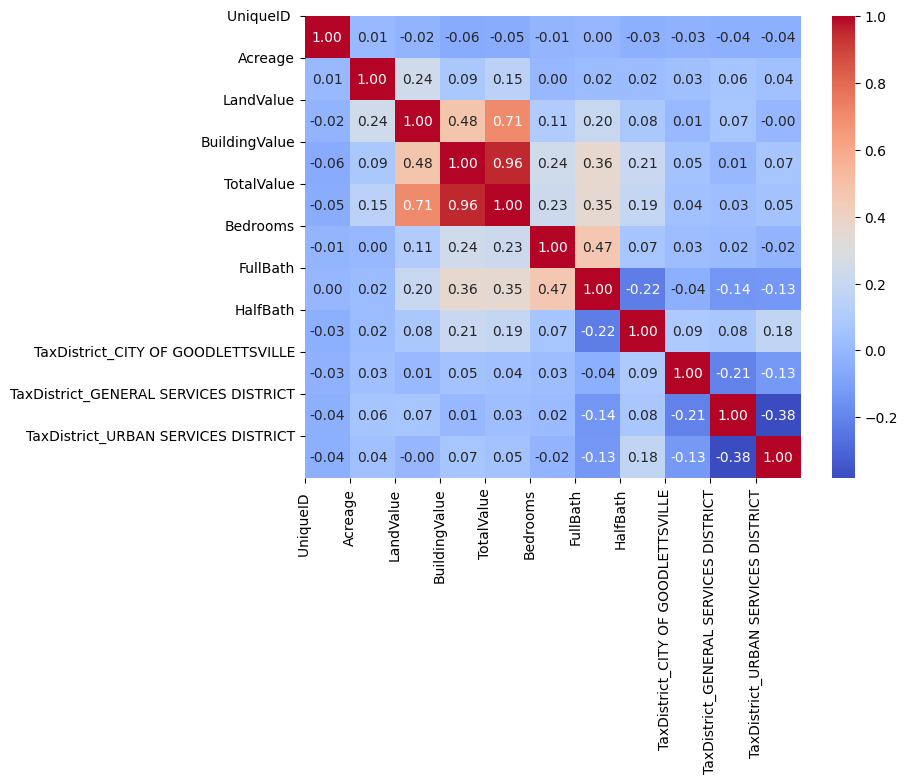

In [67]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

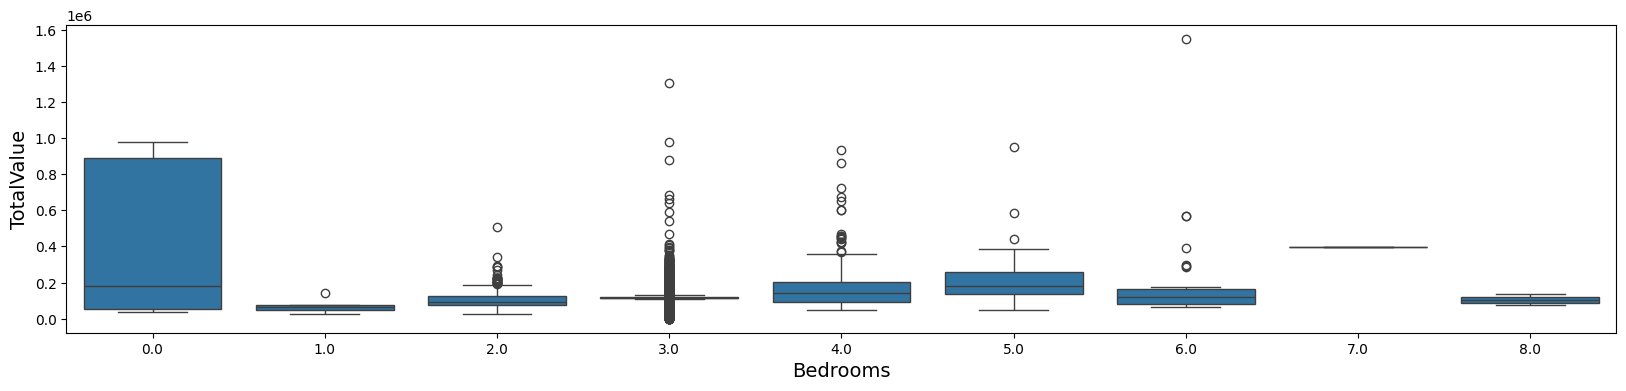

In [68]:
f, axe = plt.subplots(1,1,figsize=(20,4))
sns.boxplot(x = 'Bedrooms', y = 'TotalValue', data = dataset, ax = axe)
axe.set_xlabel('Bedrooms', fontsize=14)
axe.set_ylabel('TotalValue', fontsize=14)
plt.show()

In [69]:
df_TotalValue = dataset['TotalValue']
X = dataset.drop('TotalValue', axis = 1)
X

,UniqueID,Acreage,LandValue,BuildingValue,Bedrooms,FullBath,HalfBath,TaxDistrict_CITY OF GOODLETTSVILLE,TaxDistrict_GENERAL SERVICES DISTRICT,TaxDistrict_URBAN SERVICES DISTRICT
0,2045,2.30,50000.0,168200.0,3.0,3.0,0.0,False,True,False
1,16918,3.50,50000.0,264100.0,3.0,3.0,2.0,False,True,False
2,54582,2.90,50000.0,216200.0,4.0,3.0,0.0,False,True,False
3,43070,2.60,50000.0,147300.0,3.0,3.0,0.0,False,True,False
4,22714,2.00,50000.0,152300.0,4.0,3.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...
5874,39516,0.45,43000.0,157900.0,2.0,1.0,0.0,False,False,True
5875,21382,0.46,38700.0,152400.0,4.0,1.0,0.0,False,False,True
5876,31288,0.46,38700.0,129900.0,2.0,1.0,0.0,False,False,True
5877,9854,0.22,30000.0,103500.0,3.0,1.0,0.0,False,False,True


In [71]:
y = df_TotalValue
y

0       235700.0
1       319000.0
2       298000.0
3       197300.0
4       202300.0
          ...   
5874    204700.0
5875    191100.0
5876    175600.0
5877    133500.0
5878    229000.0
Name: TotalValue, Length: 5879, dtype: float64

In [72]:
# Splitting the dataset into the Training set and Test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state= 42) # 80% training

In [73]:
print("Shape X_train: ",X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train: ",y_train.shape)
print("Shape y_test: ",y_test.shape)

Shape X_train:  (4703, 10)
Shape X_test:  (1176, 10)
Shape y_train:  (4703,)
Shape y_test:  (1176,)


In [74]:
# Creating the linear regressor
regressor_linear = LinearRegression()

In [75]:
# Entrenamos el modelo:
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [76]:
# Ahora podemos obtener los coeficientes:
print('Coeficientes:', regressor_linear.coef_)

Coeficientes: [-6.66629108e-03  3.03947194e+02  1.02312678e+00  1.01479642e+00
  1.34997664e+02 -3.68815839e+02 -6.05134108e+02 -4.76120184e+02
  4.30206987e+02 -6.02097985e+02]


In [77]:
# Ahora podemos obtener el coeficiente intercepto:
print('Coeficiente b0:', regressor_linear.intercept_)

Coeficiente b0: 285.2505162683956


In [78]:
# Generamos un df con los coeficientes obtenidos:
pd.DataFrame(regressor_linear.coef_, X.columns, columns=['coefficient'])

,coefficient
UniqueID,-0.006666
Acreage,303.947194
LandValue,1.023127
BuildingValue,1.014796
Bedrooms,134.997664
FullBath,-368.815839
HalfBath,-605.134108
TaxDistrict_CITY OF GOODLETTSVILLE,-476.120184
TaxDistrict_GENERAL SERVICES DISTRICT,430.206987
TaxDistrict_URBAN SERVICES DISTRICT,-602.097985


In [79]:
# Predict:
y_pred = regressor_linear.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [90]:
# Calculamos el error cuadrático medio y el estadístico R^2
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
#print('RMSE: %.2f' % (mean_squared_error(y_test, y_pred,squared=False)))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('R_2: %.2f' % r2_score(y_test, y_pred))

Error cuadrático medio: 18810108.69
MAE: 1940.52
R_2: 1.00


In [91]:
# Generamos un df con los valores reales y los predichos:
df_pred= pd.DataFrame({'Real':y_test, 'Predichos':y_pred})
df_pred

,Real,Predichos
5370,113700.0,115484.006358
5299,94100.0,94583.272899
199,151500.0,144773.531809
3268,117200.0,117183.101035
3504,79700.0,81625.714477
...,...,...
4260,117200.0,117060.534607
693,114000.0,116065.818216
5386,170300.0,172468.303802
4888,81200.0,81567.591855


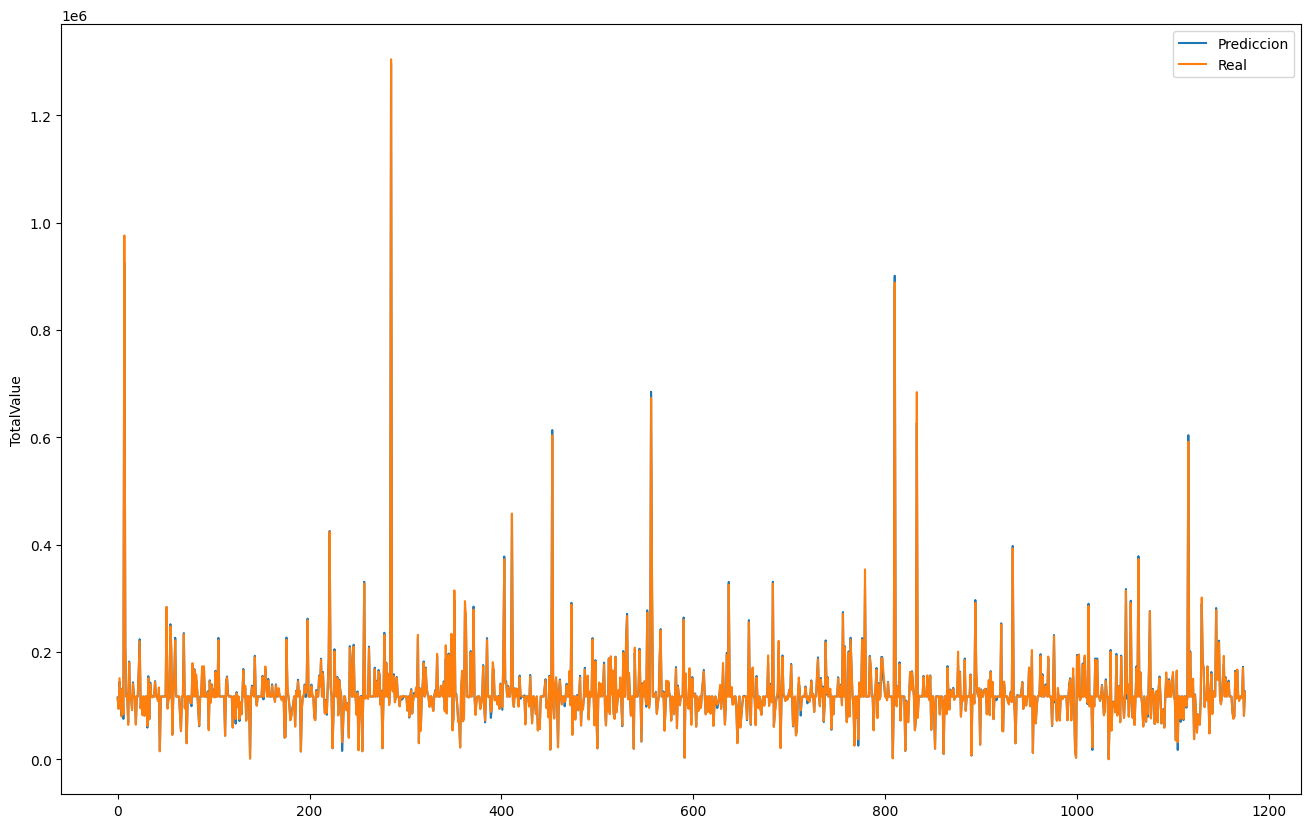

In [93]:
# Graficamos:
plt.figure(figsize = (16,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('TotalValue')
plt.legend()
plt.show()